# Global Hunger Index 2023 [Latest data]

Data source: https://www.kaggle.com/datasets/adarshde/global-hunger-index-2023-latest-data

It is important to know what index value means
|        Level       |   Value   |
|:------------------:|:---------:|
| Low                | ≤ 9.9     |
| Moderate           | 10.0-19.9 |
| Serious            | 20.0-34.9 |
| Alarming           | 35.0-49.9 |
| Extremely alarming | ≥ 50.0    |

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("data/GHI.csv")

In [3]:
df_raw.head()

,Rank,Country,2000,2008,2015,2023,Absolute change since 2015,% change since 2015
0,1,Belarus,<5,<5,<5,<5,—,—
1,1,Bosnia & Herzegovina,9.4,6.5,5.3,<5,—,—
2,1,Chile,<5,<5,<5,<5,—,—
3,1,China,13.4,7.1,<5,<5,—,—
4,1,Croatia,<5,<5,<5,<5,—,—


In [4]:
df_raw.nunique()

Rank                           94
Country                       125
2000                          101
2008                          101
2015                           95
2023                           94
Absolute change since 2015     57
% change since 2015            87
dtype: int64

In [5]:
df_raw.columns

Index(['Rank', 'Country', '2000', '2008', '2015', '2023',
       'Absolute change since 2015', '% change since 2015'],
      dtype='object')

In [6]:
df_raw.columns = ['rank', 'country', '2000', '2008', '2015', '2023',
       'abs_change', 'per_change']

In [7]:
for col in df_raw.columns:
    print(f"{col} -> {df_raw[col].unique()}")
    print("------------------------------------------------------")

rank -> [  1  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38
  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56  57  58  60
  61  62  64  65  66  67  69  71  72  74  75  77  78  79  80  81  82  83
  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125]
------------------------------------------------------
country -> ['Belarus' 'Bosnia & Herzegovina' 'Chile' 'China' 'Croatia' 'Estonia'
 'Georgia' 'Hungary' 'Kuwait' 'Latvia' 'Lithuania' 'Moldova (Republic of)'
 'Montenegro' 'North Macedonia' 'Romania' 'Serbia' 'Slovakia' 'Türkiye'
 'United Arab Emirates' 'Uruguay' 'Uzbekistan' 'Costa Rica' 'Bulgaria'
 'Kazakhstan' 'Armenia' 'Russian Federation' 'Tunisia' 'Mexico' 'Paraguay'
 'Albania' 'Argentina' 'Brazil' 'Algeria' 'Azerbaijan' 'Colombia' 'Peru'
 'Saudi Arabia' 'Jamaica' 'Kyrgyzstan' 'Mongolia'
 'Iran (Islamic Republic of)' 'Panama' 'El Salvador' 'Ukr

## Data cleaning

In [8]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   rank        125 non-null    int64 
 1   country     125 non-null    object
 2   2000        125 non-null    object
 3   2008        125 non-null    object
 4   2015        125 non-null    object
 5   2023        125 non-null    object
 6   abs_change  121 non-null    object
 7   per_change  121 non-null    object
dtypes: int64(1), object(7)
memory usage: 7.9+ KB


For data cleaning we have to worry about following:
* abs_change and per_change has null values. Also nan values is also present and we need to think of them
* 2000, 2008, abs_change and per_change columns have '—' which need to replace with an apt value (null probably)
* 2000, 2008, 2015 and 2023 columns have '<5', which seems to be there to represent approx value. We need to replace it with some sensible value (Some value between 0 and 5, probably 1)
* Most important of all we need to convert all the columns (other than contry) to float type

Lets do following
* We can keep null values as we won't we doing model training, just analysis
* nan we can replce will null
* '—' we can replace with null, as this is absanse of data
* Lets set "<5" with 1, as 0 hunger seems too good to assume
* After that lets transform colums's dtype to float

In [9]:
df = df_raw.copy()
df = df.replace([np.nan, '—'], None)
df = df.replace("<5", 1)

In [10]:
df['2000'] = pd.to_numeric(df['2000'])
df['2008'] = pd.to_numeric(df['2008'])
df['2015'] = pd.to_numeric(df['2015'])
df['2023'] = pd.to_numeric(df['2023'])
df['abs_change'] = pd.to_numeric(df['abs_change'])
df['per_change'] = pd.to_numeric(df['per_change'])

In [11]:
df.dtypes

rank            int64
country        object
2000          float64
2008          float64
2015          float64
2023          float64
abs_change    float64
per_change    float64
dtype: object

In [12]:
for col in df.columns:
    print(f"{col} -> {df[col].unique()}")
    print("------------------------------------------------------")

rank -> [  1  21  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38
  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56  57  58  60
  61  62  64  65  66  67  69  71  72  74  75  77  78  79  80  81  82  83
  84  85  86  87  88  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125]
------------------------------------------------------
country -> ['Belarus' 'Bosnia & Herzegovina' 'Chile' 'China' 'Croatia' 'Estonia'
 'Georgia' 'Hungary' 'Kuwait' 'Latvia' 'Lithuania' 'Moldova (Republic of)'
 'Montenegro' 'North Macedonia' 'Romania' 'Serbia' 'Slovakia' 'Türkiye'
 'United Arab Emirates' 'Uruguay' 'Uzbekistan' 'Costa Rica' 'Bulgaria'
 'Kazakhstan' 'Armenia' 'Russian Federation' 'Tunisia' 'Mexico' 'Paraguay'
 'Albania' 'Argentina' 'Brazil' 'Algeria' 'Azerbaijan' 'Colombia' 'Peru'
 'Saudi Arabia' 'Jamaica' 'Kyrgyzstan' 'Mongolia'
 'Iran (Islamic Republic of)' 'Panama' 'El Salvador' 'Ukr

## Feature engineering

Use follwoing table to extract hunder level class
|        Level       |   Value   |
|:------------------:|:---------:|
| Low                | ≤ 9.9     |
| Moderate           | 10.0-19.9 |
| Serious            | 20.0-34.9 |
| Alarming           | 35.0-49.9 |
| Extremely alarming | ≥ 50.0    |

In [13]:
def to_class(d: np.float64):
    if d <= 9.9:
        return "low"
    elif d <= 19.9:
        return "moderate"
    elif d <= 34.9:
        return "serious"
    elif d <= 49.9:
        return "alarming"
    else:
        return "extreme"

df["hunger_class_2023"] = df['2023'].apply(to_class)

## Data analysis

*P1*. Find 10 most hungry contries that has more hunger problem then before (2015)

In [14]:
df[df["abs_change"] > 0].sort_values(by="2023", ascending=False).head(10)

,rank,country,2000,2008,2015,2023,abs_change,per_change,hunger_class_2023
123,124,Madagascar,42.4,36.6,38.9,41.0,2.1,5.4,alarming
120,121,Lesotho,32.5,27.8,30.6,35.5,4.9,16.0,alarming
114,115,Haiti,40.3,40.2,30.1,31.1,1.0,3.3,serious
113,114,Afghanistan,49.6,36.5,30.4,30.6,0.2,0.7,serious
108,109,Nigeria,39.9,31.2,27.8,28.3,0.5,1.8,serious
106,107,Congo (Republic of),34.6,32.4,26.2,28.0,1.8,6.9,serious
107,107,Zimbabwe,35.5,30.7,27.6,28.0,0.4,1.4,serious
99,100,Syrian Arab Republic,13.9,16.2,23.9,26.1,2.2,9.2,serious
98,99,Angola,64.9,42.9,25.7,25.9,0.2,0.8,serious
79,80,Gabon,21.0,20.2,17.3,18.7,1.4,8.1,moderate


*P2*. Find 10 contries that has least hunger problem (2015)

In [15]:
df.sort_values(by=["2023", "2015", "2008", "2000"], ascending=True).head(10)

,rank,country,2000,2008,2015,2023,abs_change,per_change,hunger_class_2023
0,1,Belarus,1.0,1.0,1.0,1.0,NaN,NaN,low
2,1,Chile,1.0,1.0,1.0,1.0,NaN,NaN,low
4,1,Croatia,1.0,1.0,1.0,1.0,NaN,NaN,low
5,1,Estonia,1.0,1.0,1.0,1.0,NaN,NaN,low
8,1,Kuwait,1.0,1.0,1.0,1.0,NaN,NaN,low
9,1,Latvia,1.0,1.0,1.0,1.0,NaN,NaN,low
10,1,Lithuania,7.6,5.1,1.0,1.0,NaN,NaN,low
12,1,Montenegro,NaN,5.2,1.0,1.0,NaN,NaN,low
19,1,Uruguay,7.6,5.3,1.0,1.0,NaN,NaN,low
17,1,Türkiye,10.1,5.7,1.0,1.0,NaN,NaN,low


In [17]:
df['hunger_class_2023'].unique()

array(['low', 'moderate', 'serious', 'alarming'], dtype=object)

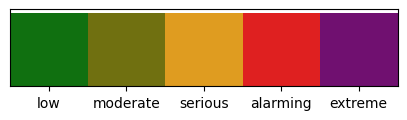

In [35]:
palette = {"low": "green", "moderate" : "olive", "serious": "orange", "alarming": "red", "extreme": "purple"}
plt.figure(figsize=(5, 1))
plt.tick_params(axis='y', left=False, labelleft=False)
sns.barplot(x=list(palette.keys()), y=[1 for _ in palette.keys()], palette=palette.values(), hue=palette.keys(), width=1)
plt.show()

*P3*. Find the trend of hunger trend in a contry

In [19]:
def trend_in_country(df: pd.DataFrame, conutry: str):
    row = df[df['country'] == conutry].reset_index(drop=True)
    if not len(row):
        print(f"ERROR: No country name: {conutry}")
        return
    
    row = row.iloc[0]
    
    col = ["2000", "2008", "2015", "2023"]
    data = []
    for c in col:
        data.append(row[c])
    sns.barplot(x=col, y=data, palette=[palette[to_class(d)] for d in data], hue=col)
    plt.show()

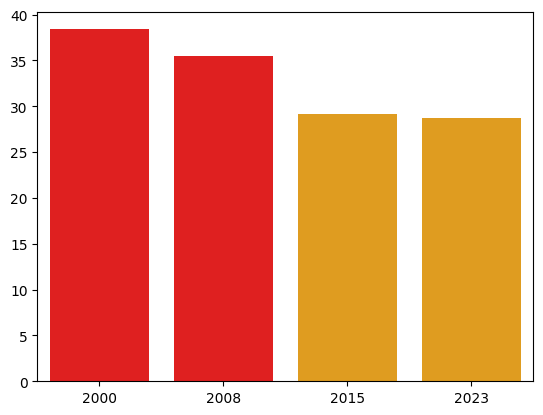

In [20]:
trend_in_country(df, "India")

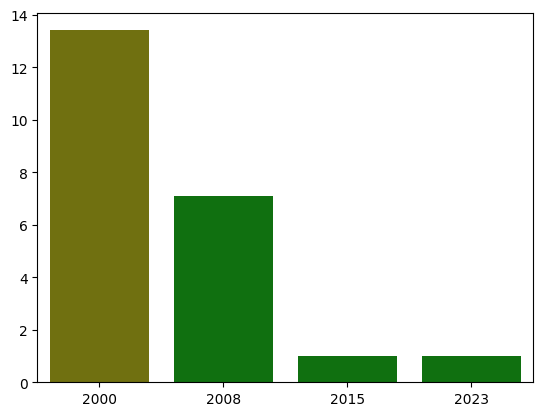

In [21]:
trend_in_country(df, "China")

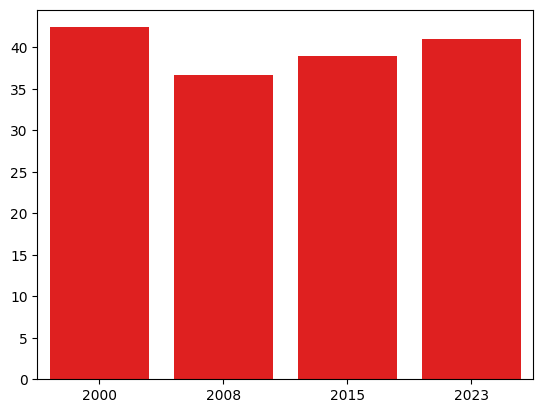

In [22]:
trend_in_country(df, "Madagascar")

*P4*. Find the trend of hunger trend in the world

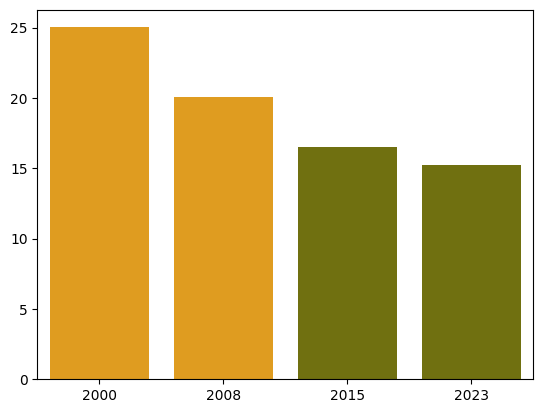

2000    25.023967
2008    20.051613
2015    16.532800
2023    15.235200
dtype: float64

In [23]:
col=["2000", "2008", "2015", "2023"]
wm = df[col].mean()
sns.barplot(x=col, y=[wm[c] for c in col], palette=[palette[to_class(wm[c])] for c in col], hue=col)
plt.show()
wm

*P5*. List down countries that have positively changed their status in 2023
*P5*. List down countries that have negetively changed their status in 2023

In [27]:
class_rank = {"low": 0, "moderate" : 1, "serious": 2, "alarming": 3, "extreme": 4}
df["class_rank_2015"] = df['2015'].apply(to_class).replace(to_replace=class_rank)
df["class_rank_2023"] = df['2023'].apply(to_class).replace(to_replace=class_rank)

In [32]:
df[df["class_rank_2023"] < df["class_rank_2015"]]

,rank,country,2000,2008,2015,2023,abs_change,per_change,hunger_class_2023,class_rank_2015,class_rank_2023
44,45,Oman,14.8,11.2,11.2,8.3,-2.9,-25.9,low,1,0
47,48,Guyana,17.2,15.1,11.3,9.3,-2.0,-17.7,low,1,0
48,49,Fiji,9.3,8.6,10.4,9.7,-0.7,-6.7,low,1,0
68,69,Nepal,37.2,29.0,21.3,15.0,-6.3,-29.6,moderate,2,1
73,74,Lao PDR,44.3,30.4,21.8,16.3,-5.5,-25.2,moderate,2,1
76,77,Indonesia,26.0,28.5,21.9,17.6,-4.3,-19.6,moderate,2,1
77,78,Namibia,26.4,29.2,22.2,18.0,-4.2,-18.9,moderate,2,1
78,79,Cameroon,36.0,29.0,20.7,18.6,-2.1,-10.1,moderate,2,1
80,81,Bangladesh,33.8,30.6,26.2,19.0,-7.2,-27.5,moderate,2,1
81,82,Guatemala,28.6,24.0,20.6,19.1,-1.5,-7.3,moderate,2,1


In [33]:
df[df["class_rank_2023"] > df["class_rank_2015"]]

,rank,country,2000,2008,2015,2023,abs_change,per_change,hunger_class_2023,class_rank_2015,class_rank_2023
51,51,Thailand,18.7,12.2,9.4,10.4,1.0,10.6,moderate,0,1
120,121,Lesotho,32.5,27.8,30.6,35.5,4.9,16.0,alarming,2,3
